# Linear Regression with one variable

### Import the Packages required to complete the regression

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

from multi import run_gradient_descent

np.set_printoptions(precision=2)

## Load the data set for Univariate linear Regression

In [78]:
data = np.loadtxt("./Data/uni_ex1.txt", delimiter=",")

In [79]:
X_train = data[:, 0]
y_train = data[:, 1]

In [80]:
print(f"First 5 values of X_train are: {X_train[:5]}")
print(f"First 5 values of y_train are: {y_train[:5]}")

First 5 values of X_train are: [6.11 5.53 8.52 7.   5.86]
First 5 values of y_train are: [17.59  9.13 13.66 11.85  6.82]


`X_train` contains the values which are the population of a cities in 10,000 of peoples  
That means if the value in X_train is 6.156 the the population of that city is 61,560
 
`y_train` contains the positive as well as the negative values which is the monthly profit or loss of our restraunt in ₹10,000

### Check the Dimension of the data you have

In [81]:
X_train.shape

(97,)

## Visualize your data using a Scatter plot

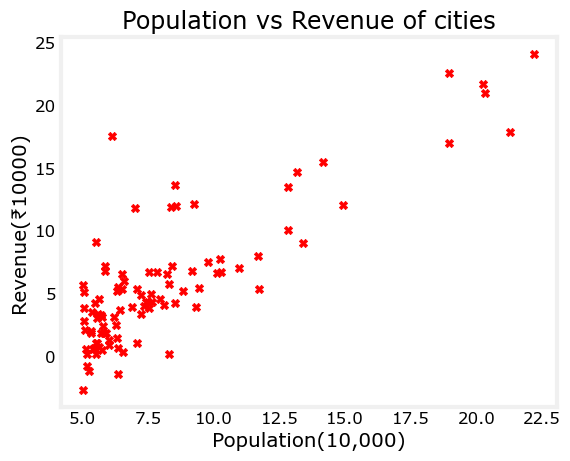

In [82]:
plt.scatter(X_train, y_train, c="r", marker="X")
plt.title("Population vs Revenue of cities")
plt.xlabel("Population(10,000)")
plt.ylabel("Revenue(₹10000)")
plt.show()

## Lets go for the linear regression of this dataset

In [83]:
def compute_gradient(x, y, alpha, iterations):
    m= x.shape[0]
    w = 0
    b = 0
    
    for i in range(iterations):
        f_wb = x * w + b
        err = f_wb - y
        j = np.sum(err**2) / (2 * m)
        
        dj_dw = np.sum((err * x)) / m
        dj_db = np.sum(err) / m
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % math.ceil(iterations / 10) == 0:
            print(f"iter: {i}, cost: {j}, w: {w}, b: {b}, dj_dw: {dj_dw}, dj_db: {dj_db}")
    return w, b

In [84]:
w, b = compute_gradient(X_train, y_train, 0.01, 1500)

iter: 0, cost: 32.072733877455676, w: 0.6532884974555672, b: 0.05839135051546393, dj_dw: -65.32884974555671, dj_db: -5.839135051546393
iter: 150, cost: 5.314397236232924, w: 0.8888949164626272, b: -0.8683454409370605, dj_dw: -0.05492292380270669, dj_db: 0.5467097435675154
iter: 300, cost: 4.964362046184744, w: 0.9610073805299465, b: -1.5861620466203945, dj_dw: -0.04190048697332264, dj_db: 0.41708275711658754
iter: 450, cost: 4.760637879102053, w: 1.0160217015468063, b: -2.1337815696397477, dj_dw: -0.031965720086352276, dj_db: 0.3181908285534184
iter: 600, cost: 4.6420682682928565, w: 1.0579919151026862, b: -2.5515583939951316, dj_dw: -0.02438652470291582, dj_db: 0.24274655724309788
iter: 750, cost: 4.573059506059272, w: 1.090010829330244, b: -2.870278723771067, dj_dw: -0.01860438574445291, dj_db: 0.18519041331665606
iter: 900, cost: 4.532895679657962, w: 1.1144379356385479, b: -3.113429235456871, dj_dw: -0.014193214209288417, dj_db: 0.14128105285566858
iter: 1050, cost: 4.5095199096979

## View the predicted values given by the model

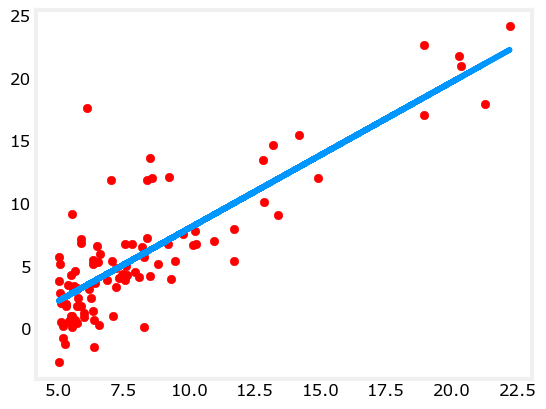

In [85]:
y_pred = X_train * w + b

plt.scatter(X_train, y_train, c="r")
plt.plot(X_train, y_pred)
plt.show()

# Linear Regression with muliple variable

### Load the multi-varible data

In [86]:
data = np.loadtxt("./Data/multi_ex2.txt", delimiter=",")

In [87]:
x_train = data[:, :2]
y_train = data[:, 2]
x_features = ["Size", "Bedrooms"]

In [88]:
x_train.shape

(47, 2)

## Reshape The data using z-score normalization

In [89]:
def zscore_normalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    
    x_norm = (x - mu) / sigma
    
    return x_norm, mu, sigma

In [90]:
x_norm, mu, sigma = zscore_normalize(x_train)

print(f"Peak to Peak range of Unnormalized data is: {np.ptp(x_train, axis=0)}")
print(f"Peak to Peak range of normalized data is: {np.ptp(x_norm, axis=0)}")

Peak to Peak range of Unnormalized data is: [3626.    4.]
Peak to Peak range of normalized data is: [4.61 5.31]


## Plot the scatter plots of normalized vs unnormalized data sets 

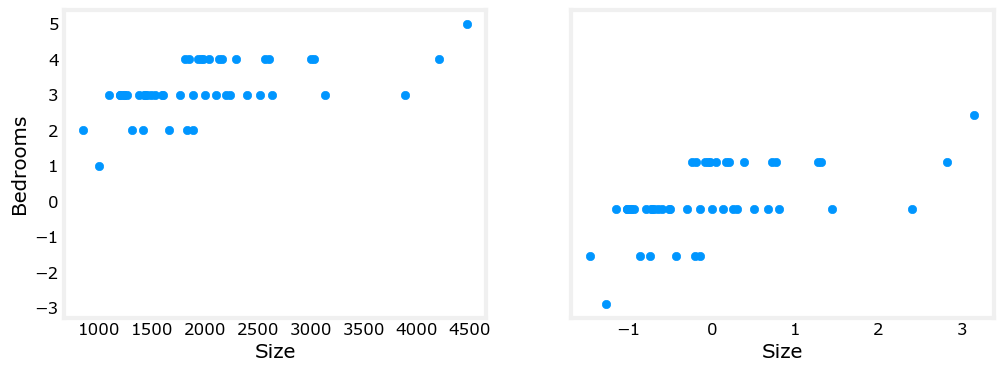

In [91]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(12, 4))

ax[0].scatter(x_train[:, 0], x_train[:, 1])
ax[0].set_xlabel("Size")

ax[1].scatter(x_norm[:, 0], x_norm[:, 1])
ax[1].set_xlabel("Size")

ax[0].set_ylabel("Bedrooms")

plt.show()

## Write Method for gradient descent for multi-variable regression

In [92]:
def compute_gradient_multi(x, y, alpha, iterations):
    m, n = x.shape
    w = np.zeros((n,))
    b = 0
    
    for i in range(iterations):
        f_wb = x @ w + b
        err = f_wb - y
        j = np.sum(err**2) / (2 * m)
        
        dj_dw = (1 / m) * (x.T @ err)
        dj_db = np.sum(err) / m
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i % math.ceil(iterations / 10) == 0:
            print(f"iter: {i}, cost: {j:.2f}, w: {w}, b: {b:.2f}")
    
    return w, b

In [93]:
w, b = compute_gradient_multi(x_norm, y_train, 0.1, 1000)

iter: 0, cost: 65591548106.46, w: [10576.41  5470.88], b: 34041.27
iter: 100, cost: 2043462824.62, w: [108831.74  -5962.3 ], b: 340404.52
iter: 200, cost: 2043280073.15, w: [109440.95  -6571.51], b: 340412.66
iter: 300, cost: 2043280050.61, w: [109447.72  -6578.28], b: 340412.66
iter: 400, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66
iter: 500, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66
iter: 600, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66
iter: 700, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66
iter: 800, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66
iter: 900, cost: 2043280050.60, w: [109447.8   -6578.35], b: 340412.66


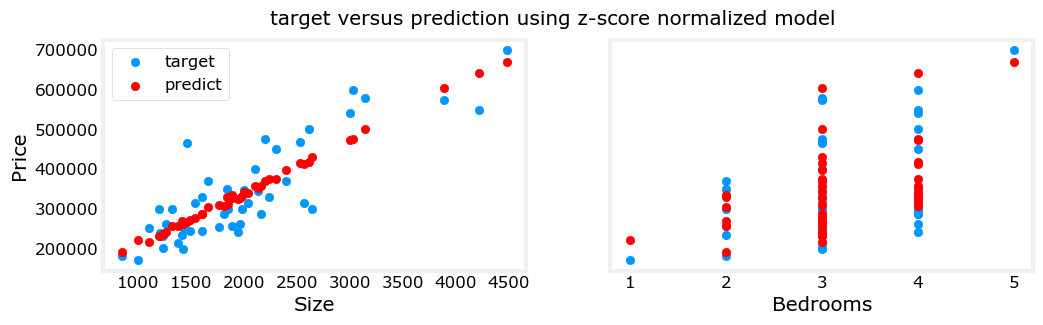

In [94]:
#predict target using normalized features
m = x_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(x_norm[i], w) + b

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,2,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color="r", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()

In [97]:
w_norm, b_norm, hist = run_gradient_descent(x_norm, y_train, 1000, 1.0e-1)

Iteration Cost          w0       w1        b      djdw0    djdw1    djdb  
---------------------|--------|--------|--------|--------|--------|--------|
        0 5.32683e+10  1.1e+04  5.5e+03  3.4e+04 -1.1e+05 -5.5e+04 -3.4e+05
      100 2.04345e+09  1.1e+05 -6.0e+03  3.4e+05 -2.8e+02  2.8e+02 -9.0e+00
      200 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -3.1e+00  3.1e+00 -2.4e-04
      300 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -3.5e-02  3.5e-02 -6.4e-09
      400 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -3.9e-04  3.9e-04 -2.8e-10
      500 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -4.3e-06  4.3e-06 -2.7e-10
      600 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -4.8e-08  4.8e-08 -2.8e-10
      700 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -5.4e-10  5.3e-10 -2.8e-10
      800 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -5.3e-11  3.3e-12 -2.8e-10
      900 2.04328e+09  1.1e+05 -6.6e+03  3.4e+05 -5.3e-11  3.3e-12 -2.8e-10
w,b found by gradient descent: w: [109447.8   -6578.35], b: 340412.66


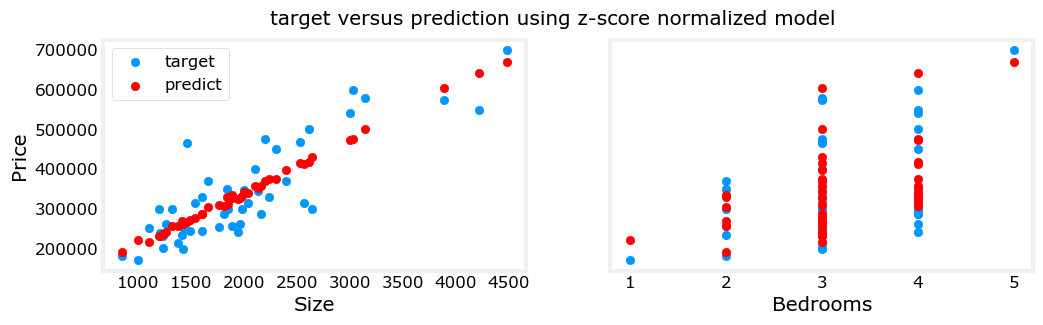

In [98]:
#predict target using normalized features
m = x_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(x_norm[i], w_norm) + b_norm

    # plot predictions and targets versus original features    
fig,ax=plt.subplots(1,2,figsize=(12, 3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i],y_train, label = 'target')
    ax[i].set_xlabel(x_features[i])
    ax[i].scatter(x_train[:,i],yp,color="r", label = 'predict')
ax[0].set_ylabel("Price"); ax[0].legend();
fig.suptitle("target versus prediction using z-score normalized model")
plt.show()